# The pyabf Cookbook: Getting Started
_First time pyabf users should review all items in this document._

Running `pip install --upgrade pyabf` will install (or upgrade) the pyabf package on your system.

## Preparing the Environment

First let's import libraries we intend to use later

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

Now tweak the styles to help output of text and graphs look good in this document. These codes are all optional.

In [2]:
%matplotlib inline
plt.style.use('seaborn')
np.set_printoptions(precision=3) # numpy float precision when displayed

If you intend to import the pyabf package in this development folder (not the one which may be already installed on the system), modify the system path list to stick the location of the local / development pyabf folder at the top of the list:

In [3]:
sys.path.insert(0, '../src/')

Importing the package is now straightforward. You can double-check the location of the imported package with `abf.info()`

In [4]:
import pyabf
pyabf.info()

pyabf 0.1.4 was imported from C:\Users\scott\Documents\GitHub\pyABF\src\pyabf


## Loading an ABF and Accessing Sweep Data
Although there are multiple ways to extract command and signal data from ABF files, the most common use case is to get it sweep by sweep. Use `abf.setSweep(sweepNumber)` to select a sweep, then items starting with `abf.data` and `abf.units` are filled with data related to that sweep.

In [5]:
abf=pyabf.ABF("../data/17o05028_ic_steps.abf")
abf.setSweep(7) # sweeps numbers start at 0
print(abf.dataY, abf.units)
print(abf.dataC, abf.unitsCommand)
print(abf.dataX, abf.unitsTime)

[-51.249 -51.249 -51.282 ..., -45.679 -45.679 -45.711] mV
[ 0.  0.  0. ...,  0.  0.  0.] pA
[ 0.  0.  0. ...,  3.  3.  3.] seconds


### Plotting sweeps with `setSweep()`

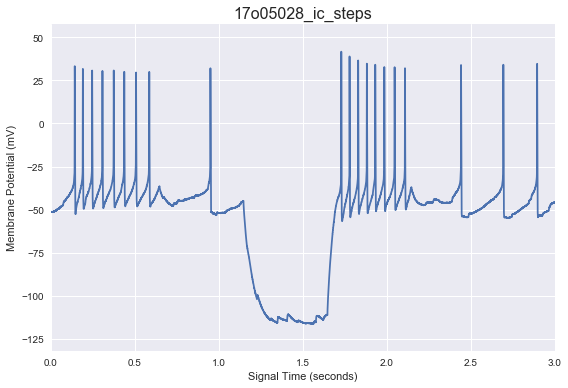

In [6]:
plt.plot(abf.dataX,abf.dataY) # plot signal data
abf.plotDecorate(); # make the data and labels look nice

### Plotting overlapping sweeps

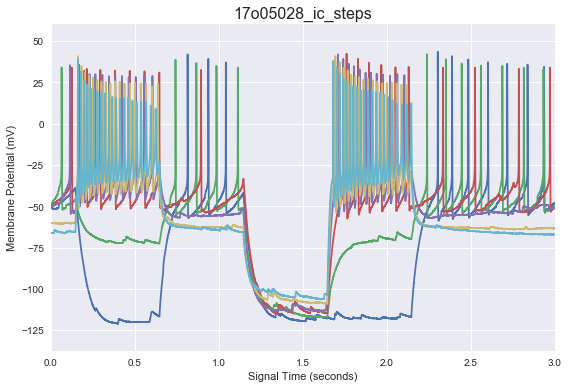

In [7]:
for sweepNumber in abf.sweepList[::3]: # every third sweep
    abf.setSweep(sweepNumber)
    plt.plot(abf.dataX, abf.dataY, label="sweep %d"%sweepNumber)
abf.plotDecorate();

### Plotting stacked sweeps

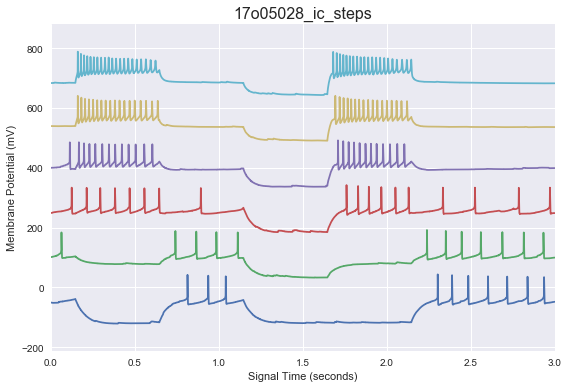

In [8]:
for sweepNumber in abf.sweepList[::3]: # show only every third sweep
    abf.setSweep(sweepNumber)
    offsetY=50*sweepNumber
    plt.plot(abf.dataX, abf.dataY+offsetY)
abf.plotDecorate();

### Sweep time vs. absolute time
Sometimes you're not interested in sweeps at all. Looping through sweeps with `absoluteTime=True` is probably the easiest way to display data regardless of sweep breaks.

In [9]:
print("Each sweep is", abf.sweepLengthSec, "seconds")

abf.setSweep(7)
print("sweep time:", abf.dataX)

abf.setSweep(7,absoluteTime=True)
print("absolute time:", abf.dataX)

Each sweep is 3.0 seconds
sweep time: [ 0.  0.  0. ...,  3.  3.  3.]
absolute time: [ 21.  21.  21. ...,  24.  24.  24.]


If you set `absoluteTime=True` when running `setSweep()`, `abf.dataX` will be an absolute file time. This means plotting X,Y data will cause the graph to _appear_ as one continuous trace.

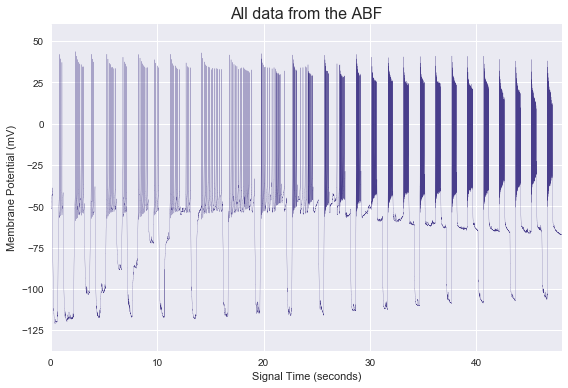

In [10]:
for sweepNumber in abf.sweepList:
    abf.setSweep(sweepNumber,absoluteTime=True)
    plt.plot(abf.dataX, abf.dataY,color='darkslateblue',linewidth=.2)
abf.plotDecorate(title="All data from the ABF");

#### Notes

* I find it helpful to  use an extremely thin linewidth when visualizing highly overlapping data
* I manually defined a color because if I didn't, it would be colored by sweep and look funny

## Plotting All Data in an ABF
If you _really_ want to display all data with one command, note that `abf.signalData` contains one straight-shot of all data in the ABF not broken-up by sweeps (and `abf.signalTimes` holds the times for this data). Plotting this is slightly less resource intense than using `setSweep()`. It also reduces artifacts which may appear where sweeps intersect.

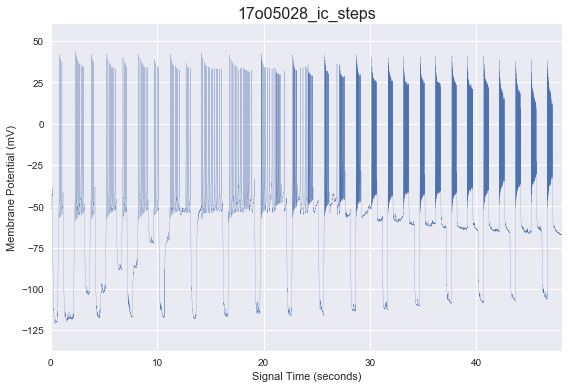

In [11]:
plt.plot(abf.signalTimes, abf.signalData,linewidth=.2)
abf.plotDecorate()

## Working with command signals

Holding current (or clamp voltage) can be accessed with `abf.commandHold`. If multi-channel ABFs are being used, `abf.commandHoldingByDAC` is a list containing holding values for all signals.

In [12]:
print("pre-epoch holding is:", abf.commandHold, abf.units)

pre-epoch holding is: 0.0 mV


Plotting the command signal is the same as plotting the signal trace, just with different units

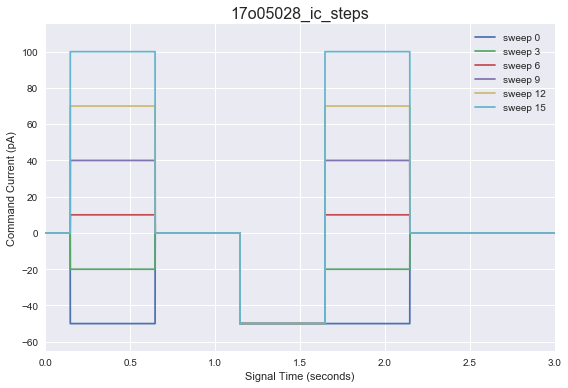

In [13]:
for sweepNumber in abf.sweepList[::3]: # every third sweep
    abf.setSweep(sweepNumber)
    plt.plot(abf.dataX, abf.dataC, label="sweep %d"%sweepNumber)
abf.plotDecorate(command=True) # indicate this is a command plot, not a signal plot
plt.legend();

Let's get fancy and plot a sweep's signal trace alongside its command trace

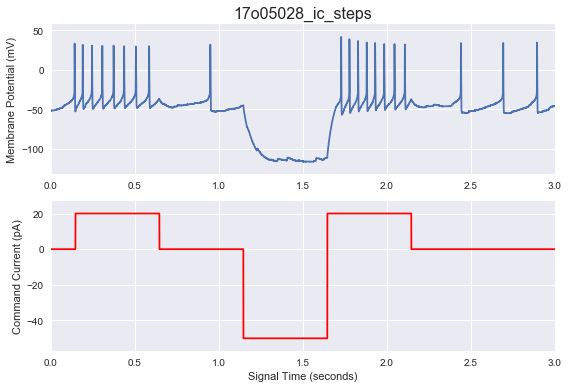

In [14]:
abf.setSweep(7)
plt.subplot(211)
plt.plot(abf.dataX,abf.dataY)
abf.plotDecorate(xlabel=False)
plt.subplot(212)
plt.plot(abf.dataX,abf.dataC,color='r')
abf.plotDecorate(command=True,title=False)
plt.show()

## Working with Multi-Channel Data

The simplest way to access multi-channel data is to use the `channel` argument when calling `setSweep()`. Channel numbers (like sweep numbers) start at zero.

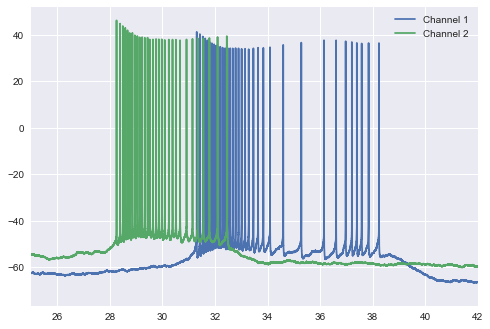

In [15]:
abf=pyabf.ABF("../data/14o08011_ic_pair.abf")

abf.setSweep(0,channel=0)
plt.plot(abf.dataX,abf.dataY,label="Channel 1")

abf.setSweep(0,channel=1)
plt.plot(abf.dataX,abf.dataY,label="Channel 2")

plt.axis([25,42,None,None]) # focus on the interesting part
plt.legend();

Alternatively, you could used a stacked view:

[25, 42, None, None]

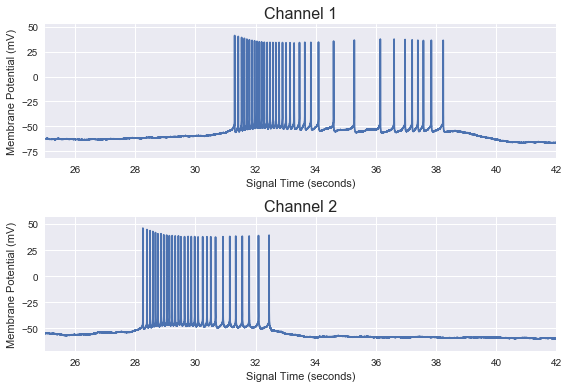

In [16]:
ax1=plt.subplot(211)
abf.setSweep(0,channel=0)
plt.plot(abf.dataX,abf.dataY)
abf.plotDecorate(title="Channel 1")

ax2=plt.subplot(212,sharex=ax1)
abf.setSweep(0,channel=1)
plt.plot(abf.dataX,abf.dataY)
abf.plotDecorate(title="Channel 2")

plt.axis([25,42,None,None]) # focus on the interesting part